In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import root
import yaml
pd.set_option('display.max_rows', None)

In [258]:
# result = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/best_run_beis_comparison/demand_none-carbon_141855675-datetime_2020-02-05_10-57-35-capacity_52152.csv')
# res = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/best_run_beis_comparison/demand_none-carbon_141855675-datetime_2020-02-05_14-16-01-capacity_52152.csv')

# res = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/best_run_beis_comparison/demand_none-carbon_19900894799999998-datetime_2020-02-06_12-41-33-capacity_52152.csv')

res = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/best_run_beis_comparison/demand_none-carbon_21392222999999998-datetime_2020-02-06_14-16-10-capacity_52152.csv')


res['year'] = np.repeat(list(range(int(len(res.index)/8))), 8)
try:
    result = res.drop('hourly_accepted_bids', axis=1)
except:
    result = res.copy()
    
result.head()

Unnamed: 0  contributed_CCGT  contributed_Coal  contributed_Onshore  \
0           0         335035.92         214207.71         23300.555309   
1           1         233863.62         197111.32         23464.752699   
2           2         318964.62         228639.43         21601.843042   
3           3         349199.64         222821.08         23278.203832   
4           4         157245.42         126729.43         22191.845222   

   contributed_Offshore  contributed_PV  contributed_Nuclear  \
0          29579.745224     3154.551065        165604.866874   
1          29595.668288     3122.286319        165604.866874   
2          29224.130128     1658.945670        165604.866874   
3          29656.706700     3188.160175        165604.866874   
4          29595.668288     3116.600720        148459.399850   

   contributed_Recip_gas  contributed_Biomass  total_CCGT  total_Coal  \
0               8583.530                    0     31912.0     14475.0   
1               1884.710                    0     31912.0     14475.0   
2              10466.785                    0     31912.0     14475.0   
3              13192.970                    0     31912.0     14475.0   
4                  0.000                    0     31912.0     14475.0   

   total_Onshore  total_Offshore  total_PV  total_Nuclear  total_Recip_gas  \
0         8862.6          6983.8    3377.8         9361.0            971.5   
1         8862.6          6983.8    3377.8         9361.0            971.5   
2         8862.6          6983.8    3377.8         9361.0            971.5   
3         8862.6          6983.8    3377.8         9361.0            971.5   
4         8862.6          6983.8    3377.8         9361.0            971.5   

   Carbon_tax  total_genco_wealth  Electricity_cost  Carbon_emitted  year  
0  225.306328        1.286573e+10         89.053626     1188.515724     0  
1  225.306328        7.840353e+09         55.833241      923.165393     0  
2  225.306328        1.655134e+10         88.228209     1191.869694     0  
3  225.306328        3.410932e+10        110.261343     1247.646225     0  
4  225.306328        1.984456e+10         45.177324      602.039209     0

In [259]:
result

Unnamed: 0  contributed_CCGT  contributed_Coal  contributed_Onshore  \
0             0         335035.92         214207.71         23300.555309   
1             1         233863.62         197111.32         23464.752699   
2             2         318964.62         228639.43         21601.843042   
3             3         349199.64         222821.08         23278.203832   
4             4         157245.42         126729.43         22191.845222   
5             5         347391.84         233727.03         23464.752699   
6             6         178140.48         113986.73         25582.054004   
7             7         180025.38         151340.30         31310.357158   
8             8         314785.08         235402.19         23020.557437   
9             9         227099.28         204839.51         23182.781702   
10           10         329265.90         215589.74         21342.258238   
11           11         358702.32         212428.73         22998.474553   
12           12         172607.34         112233.78         21909.874224   
13           13         334029.36         247291.75         23182.781702   
14           14         202806.96          89692.00         25315.936550   
15           15         182671.38         151136.88         30888.903750   
16           16         265175.46         159361.07         21279.204678   
17           17         184536.90         115217.31         20967.506721   
18           18         285633.78         191007.22         20808.835488   
19           19         270696.54         176484.29         21562.922839   
20           20         134908.56          67786.31         17582.893238   
21           21         279158.04         186629.25         21783.090917   
22           22         117582.54          95257.43         19825.761809   
23           23         117091.44         127069.00         20413.386441   
24           24         243749.70         178659.82         21223.858612   
25           25         159112.14         142774.93         20859.189052   
26           26         265469.40         210363.19         20762.524584   
27           27         285222.00         160303.65         21515.992687   
28           28         108602.64          95122.48         17542.409900   
29           29         258511.32         208643.78         21724.963415   
30           30          84877.32         126588.00         19777.880669   
31           31         147157.92          94992.78         20357.247711   
32           32         239522.58         175025.64         20583.990691   
33           33         181119.00         116528.50         19973.943034   
34           34         301081.32         162883.76         20428.079138   
35           35         265556.64         165384.80         21110.403697   
36           36         112807.44          90755.20         17484.857724   
37           37         250617.18         199863.71         21462.079447   
38           38         100988.04         104625.72         19715.808856   
39           39         169141.74          66017.51         19951.976056   
40           40         237324.48         159003.84         18428.324878   
41           41         139407.84         151774.24         17877.686093   
42           42         238017.84         174982.52         19358.946457   
43           43         247025.70         167080.07         18693.135896   
44           44         103692.24          96372.87         17016.145790   
45           45         254232.36         149408.48         19193.833814   
46           46          73942.38         117665.02         19159.055288   
47           47         107349.72         109301.51         18691.105211   
48           48         220289.04         171501.16         18291.176141   
49           49         155299.68         133827.44         17744.635364   
50           50         222540.48         189697.88         19214.871775   
51           51         239344.62         177247.85  

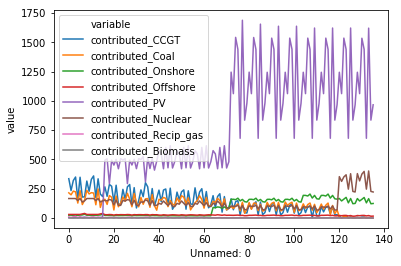

In [260]:

result_filtered = result.filter(regex='contributed_|year|Unnamed: 0')
result_long = result_filtered.melt(id_vars=['Unnamed: 0','year'])
result_long.head()

result_long.value=result_long.value/1000

sns.lineplot(data=result_long, x='Unnamed: 0', hue='variable', y='value')

In [261]:
def get_mix(df):
#     df['actual_perc'] = df['value_actual'] / df['value_actual'].sum()
    df['simulated_perc'] = df['actual'] / df['actual'].sum()
    return df


def get_projection_difference_sum(results_df, year_to_compare=None):
    ROOT_DIR = '/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run'
    
    contributed_results = results_df.filter(regex='contributed_')  # .tail(MARKET_TIME_SPLICES)
    contributed_results *= 1 / 24

    # best_mix_year = contributed_results.apply(get_year)
    best_mix_year = contributed_results.copy()
    # best_mix_year['year'] = np.repeat(list(range(YEARS_TO_RUN)), 8)
    best_mix_year['year'] = np.repeat(list(range(int(len(best_mix_year.index)/8))), 8)
    # print("contributed_results: {}".format(contributed_results))
    best_mix_year = best_mix_year.rename(columns={'contributed_PV': "contributed_solar"})
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])
    # contributed_results['cluster_size'] = [22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0]
    # print("best_mix_year: {}".format(best_mix_year))
    results_wa = best_mix_year.groupby('year').apply(
        lambda x: np.average(x, weights=cluster_size.values, axis=0)).to_frame()
    # print("results_wa: {}".format(results_wa))
    results_wa_split = pd.DataFrame(results_wa)
    # print(results_wa.values)
    results_wa_split[
        ['ccgt', "coal", 'onshore', 'offshore', 'solar', 'nuclear', 'recip_gas', 'biomass', 'year']] = pd.DataFrame(
        results_wa[0].values.tolist(), index=results_wa.index)
    results_wa_split

#     results_wa_split['wind'] = results_wa_split['offshore'] + results_wa_split['onshore']
#     results_wa_split['Natural_gas'] = results_wa_split['ccgt'] + results_wa_split['recip_gas']
#     results_wa_split['Renewables'] = results_wa_split['biomass'] + results_wa_split['wind'] + results_wa_split['solar']
#     results_wa_split = results_wa_split.drop(['offshore', 'onshore', 'ccgt', 'recip_gas', 'biomass', 'wind', 'solar'],
#                                              axis=1)
    results_wa_split = results_wa_split.drop([0, 'year'], axis=1)
    results_wa_long = pd.melt(results_wa_split.reset_index(), id_vars="year")
    results_wa_long['year'] += 2018
    # print("results_wa_long: {}".format(results_wa_long))

    if year_to_compare is not None:
        # results_wa_long = results_wa_long[results_wa_long.year == year_to_compare+1]
        results_wa_long = results_wa_long[results_wa_long.year == year_to_compare]

    results_wa_long = results_wa_long.rename(columns={'variable': "fuel_type"})
    results_wa_long = results_wa_long.set_index(['year', 'fuel_type'])

    joined = results_wa_long.rename(columns={'value': 'actual'})
    joined = joined.groupby("year").apply(get_mix)
    joined = joined.reset_index()
    return joined

In [262]:
per_year_dat = get_projection_difference_sum(result)

per_year_long = per_year_dat.melt(['year','fuel_type'])
per_year_long.head()

year fuel_type variable         value
0  2018      ccgt   actual  10144.350281
1  2019      ccgt   actual  10356.728116
2  2020      ccgt   actual   7782.897486
3  2021      ccgt   actual   7399.916562
4  2022      ccgt   actual   7819.907678

   year fuel_type        actual  simulated_perc
0  2018      ccgt  10144.350281        0.381575
1  2019      ccgt  10356.728116        0.390409
2  2020      ccgt   7782.897486        0.194319
3  2021      ccgt   7399.916562        0.184808
4  2022      ccgt   7819.907678        0.198837


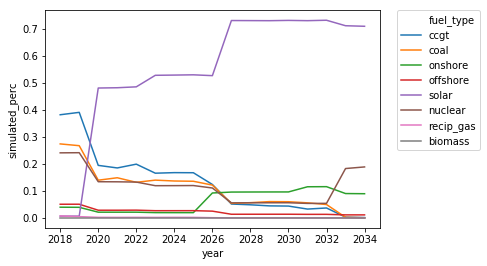

In [263]:
print(per_year_dat.head())
sns.lineplot(data=per_year_dat, x='year', hue='fuel_type', y='simulated_perc')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

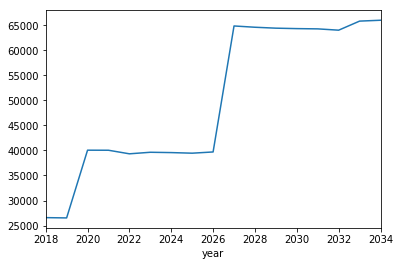

In [264]:
total_demand = per_year_dat.groupby('year')['actual'].sum()
total_demand.plot()
# sns.lineplot(data=per_year_dat, x='year', hue='fuel_type', y='total_demand')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

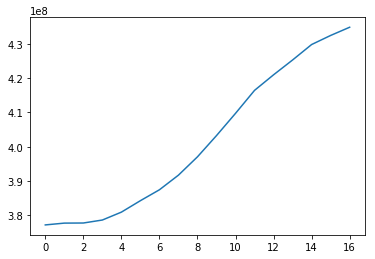

In [265]:
electricity_ktoe = [24822.84204, 24470.32991, 24301.10466, 24288.25851, 24438.20398, 24717.02662, 24995.8011, 25361.32776, 25813.71342, 26342.63171, 26893.41806, 27471.23698, 27867.29557, 28262.51807, 28754.44771, 29191.80642, 29648.75735]
renewables_ktoe = [7609.872531, 8007.503459, 8179.451416, 8267.036507, 8314.81648, 8323.254324, 8317.588187, 8318.702017, 8325.651362, 8328.676807, 8335.161717, 8333.378709, 8327.276614, 8303.48562, 8198.764019, 7988.909411, 7737.627294]

final_consumption = [(elec+renew) * 11630 for elec, renew in zip(electricity_ktoe, renewables_ktoe)]
plt.plot(final_consumption)


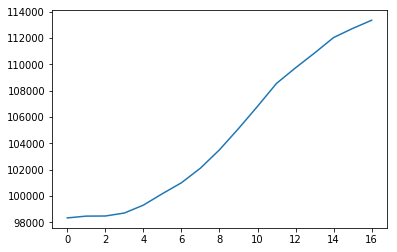

In [240]:
multi_year_data_scaled = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/elecsim/data/processed/multi_day_data/4_medoids_scaled.csv')


# BEIS Final Electricity Consumption
electricity_ktoe = [24822.84204, 24470.32991, 24301.10466, 24288.25851, 24438.20398, 24717.02662, 24995.8011, 25361.32776, 25813.71342, 26342.63171, 26893.41806, 27471.23698, 27867.29557, 28262.51807, 28754.44771, 29191.80642, 29648.75735]
renewables_ktoe = [7609.872531, 8007.503459, 8179.451416, 8267.036507, 8314.81648, 8323.254324, 8317.588187, 8318.702017, 8325.651362, 8328.676807, 8335.161717, 8333.378709, 8327.276614, 8303.48562, 8198.764019, 7988.909411, 7737.627294]

final_consumption = [(elec+renew) * 11630 for elec, renew in zip(electricity_ktoe, renewables_ktoe)]

def get_difference(scaler, df, required_mwh):
    load_dat = df[df.data_type=='load']
    load_total = load_dat.capacity_factor * scaler
    return load_total.sum() - required_mwh

demand_sizes = [root(fun=get_difference, x0=50000, args=(multi_year_data_scaled, consumption)).x for consumption in final_consumption]
plt.plot(demand_sizes)

In [241]:
result.head()

Unnamed: 0  contributed_CCGT  contributed_Coal  contributed_Onshore  \
0           0         334986.36         211139.35         23300.555309   
1           1         216271.86         215128.06         23464.752699   
2           2         325114.86         225517.35         21601.843042   
3           3         358221.60         216510.56         23278.203832   
4           4         162358.14         117813.49         22191.845222   

   contributed_Offshore  contributed_PV  contributed_Nuclear  \
0          29579.745224     3154.551065        165604.866874   
1          29595.668288     3122.286319        165604.866874   
2          29224.130128     1658.945670        165604.866874   
3          29656.706700     3188.160175        165604.866874   
4          29595.668288     3116.600720        148459.399850   

   contributed_Recip_gas  contributed_Biomass  total_CCGT  total_Coal  \
0               11435.33                    0     31912.0     14475.0   
1                1884.71                    0     31912.0     14475.0   
2               10124.86                    0     31912.0     14475.0   
3               13192.97                    0     31912.0     14475.0   
4                   0.00                    0     31912.0     14475.0   

   total_Onshore  total_Offshore  total_PV  total_Nuclear  total_Recip_gas  \
0         8862.6          6983.8    3377.8         9361.0            971.5   
1         8862.6          6983.8    3377.8         9361.0            971.5   
2         8862.6          6983.8    3377.8         9361.0            971.5   
3         8862.6          6983.8    3377.8         9361.0            971.5   
4         8862.6          6983.8    3377.8         9361.0            971.5   

   Carbon_tax  total_genco_wealth  Electricity_cost  Carbon_emitted  year  
0  202.500577        1.347299e+10         89.925821     1187.310330     0  
1  202.500577        7.675212e+09         55.086051      927.515008     0  
2  202.500577        1.613687e+10         88.733304     1196.693971     0  
3  202.500577        3.289052e+10        109.628827     1250.078393     0  
4  202.500577        2.041794e+10         44.607607      593.399980     0

(0, 261.15994420000004)

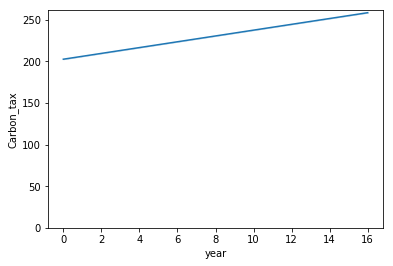

In [242]:
sns.lineplot(data=result,x='year',y='Carbon_tax')
plt.ylim(0)

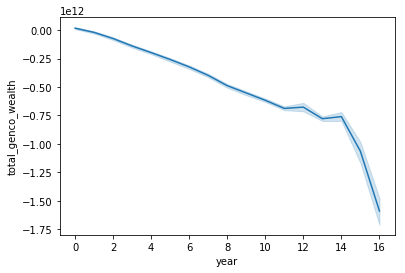

In [243]:
sns.lineplot(data=result,x='year',y='total_genco_wealth')

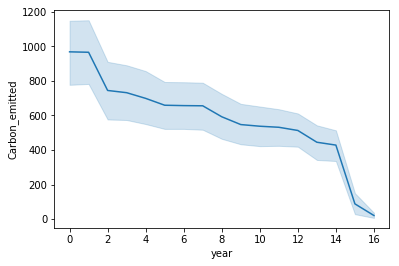

In [244]:
sns.lineplot(data=result,x='year',y='Carbon_emitted')

(0, 100.51133662020754)

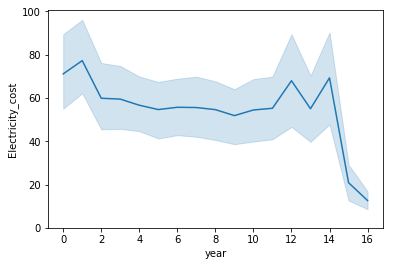

In [245]:
sns.lineplot(data=result,x='year',y='Electricity_cost')
plt.ylim(0)

In [228]:
hourly_dat_total = []
for row in res[res.year==16].iterrows():
    hourly_dat = pd.DataFrame(yaml.load(row[1]['hourly_accepted_bids']))
    hourly_dat['id'] = row[0]
    hourly_dat_total.append(hourly_dat)
    
hourly_dat_total_df = pd.concat(hourly_dat_total)

In [229]:
hourly_dat_total_df.head()

plant_type  segment_hours  capacity_bid   id
0         PV           26.0      0.000000  128
1         PV           52.0      0.000000  128
2         PV           78.0      0.000000  128
3         PV          104.0      2.066416  128
4         PV          130.0    133.002048  128

In [230]:
hourly_dat_total_df[hourly_dat_total_df.id==128]

plant_type  segment_hours  capacity_bid   id
0                PV           26.0      0.000000  128
1                PV           52.0      0.000000  128
2                PV           78.0      0.000000  128
3                PV          104.0      2.066416  128
4                PV          130.0    133.002048  128
5                PV          156.0    304.138864  128
6                PV          182.0    328.560144  128
7                PV          208.0    113.840736  128
8                PV          234.0      0.000000  128
9                PV          260.0      0.000000  128
10               PV          286.0      0.000000  128
11               PV          312.0      0.000000  128
12               PV          338.0      0.000000  128
13               PV          364.0      0.000000  128
14               PV          390.0      0.000000  128
15               PV          416.0      2.066416  128
16               PV          442.0    133.002048  128
17               PV          468.0    304.138864  128
18               PV          494.0    328.560144  128
19               PV          520.0    113.840736  128
20               PV          546.0      0.000000  128
21               PV          572.0      0.000000  128
22               PV          598.0      0.000000  128
23               PV          624.0      0.000000  128
24               PV           26.0      0.000000  128
25               PV           52.0      0.000000  128
26               PV           78.0      0.000000  128
27               PV          104.0      3.274744  128
28               PV          130.0    210.774432  128
29               PV          156.0    481.982776  128
30               PV          182.0    520.684296  128
31               PV          208.0    180.408624  128
32               PV          234.0      0.000000  128
33               PV          260.0      0.000000  128
34               PV          286.0      0.000000  128
35               PV          312.0      0.000000  128
36               PV          338.0      0.000000  128
37               PV          364.0      0.000000  128
38               PV          390.0      0.000000  128
39               PV          416.0      3.274744  128
40               PV          442.0    210.774432  128
41               PV          468.0    481.982776  128
42               PV          494.0    520.684296  128
43               PV          520.0    180.408624  128
44               PV          546.0      0.000000  128
45               PV          572.0      0.000000  128
46               PV          598.0      0.000000  128
47               PV          624.0      0.000000  128
48               PV           26.0      0.000000  128
49               PV           52.0      0.000000  128
50               PV           78.0      0.000000  128
51               PV          104.0      1.418472  128
52               PV          130.0     91.298016  128
53               PV          156.0    208.773288  128
54               PV          182.0    225.537048  128
55               PV          208.0     78.144912  128
56               PV          234.0      0.000000  128
57               PV          260.0      0.000000  128
58               PV          286.0      0.000000  128
59               PV          312.0      0.000000  128
60               PV          338.0      0.000000  128
61               PV          364.0      0.000000  128
62               PV          390.0      0.000000  128
63               PV          416.0      1.418472  128
64               PV          442.0     91.298016  128
65               PV          468.0    208.773288  128
66               PV          494.0    225.537048  128
67               PV          520.0     78.144912  128
68               PV          546.0      0.000000  128
69               PV          572.0      0.000000  128
70               PV          598.0      0.000000  128
71               PV          624.0      0.000000  128
72               PV           26.0      0.000000  128
73           